In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
import os

In [7]:
df = pd.read_csv("C:/Users/rajvi/OneDrive/Personal/census.csv")

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [27]:
df1 = df[["education-num","race","capital-gain","hours-per-week"]]

In [31]:
cap = df1["capital-gain"]
edu = df1["education-num"]

In [33]:
##simple linear regression using OLS

result = smf.ols("cap ~ edu", data = df1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cap   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     777.1
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          1.11e-169
Time:                        07:07:28   Log-Likelihood:            -5.0440e+05
No. Observations:               48842   AIC:                         1.009e+06
Df Residuals:                   48840   BIC:                         1.009e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2576.6548    135.341    -19.038      0.0

<AxesSubplot:xlabel='capital-gain', ylabel='education-num'>

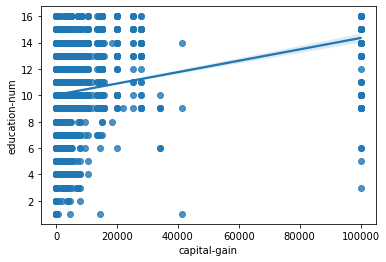

In [35]:
sns.regplot(x = "capital-gain",y = "education-num", data = df1)

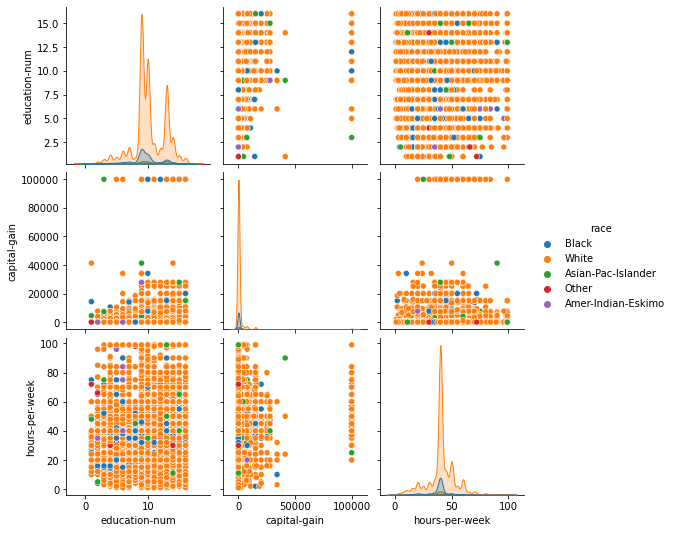

In [36]:
##moving on to race and capital-gain 

sns.pairplot(df1, hue = "race")

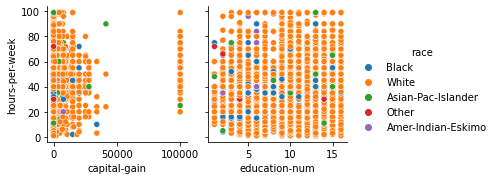

In [37]:
##I think that there is a relationship between capital gain and race. there is clear differences between black and white. 

sns.pairplot(df1, x_vars=["capital-gain","education-num"],y_vars =["hours-per-week"],hue = "race")

In [38]:
df1.corr()

,education-num,capital-gain,hours-per-week
education-num,1.000000,0.125146,0.143689
capital-gain,0.125146,1.000000,0.082157
hours-per-week,0.143689,0.082157,1.000000


In [140]:
racedf = df1[df1.race.isin(["White","Black","Asian-Pac-Islander"])]

In [141]:
racedf

,education-num,race,capital-gain,hours-per-week
0,7,Black,0,40
1,9,White,0,50
2,12,White,0,40
3,10,Black,7688,40
4,10,White,0,30
...,...,...,...,...
48837,12,White,0,38
48838,9,White,0,40
48839,9,White,0,40
48840,9,White,0,20


In [142]:
racedf.corr()

,education-num,capital-gain,hours-per-week
education-num,1.000000,0.125209,0.144549
capital-gain,0.125209,1.000000,0.081796
hours-per-week,0.144549,0.081796,1.000000


<AxesSubplot:xlabel='race', ylabel='capital-gain'>

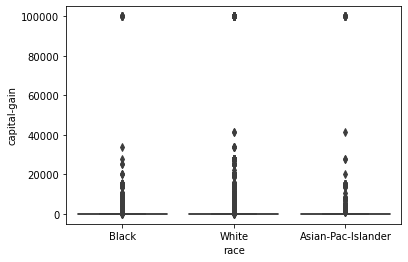

In [143]:
sns.boxplot(y="capital-gain",x="race",data = racedf)

In [144]:
racedf

,education-num,race,capital-gain,hours-per-week
0,7,Black,0,40
1,9,White,0,50
2,12,White,0,40
3,10,Black,7688,40
4,10,White,0,30
...,...,...,...,...
48837,12,White,0,38
48838,9,White,0,40
48839,9,White,0,40
48840,9,White,0,20


In [145]:
##Adding a dummy variable will help with the regression result

races = pd.get_dummies(racedf)

In [146]:
races.columns

Index(['education-num', 'capital-gain', 'hours-per-week',
       'race_Asian-Pac-Islander', 'race_Black', 'race_White'],
      dtype='object')

In [147]:
races

,education-num,capital-gain,hours-per-week,race_Asian-Pac-Islander,race_Black,race_White
0,7,0,40,0,1,0
1,9,0,50,0,0,1
2,12,0,40,0,0,1
3,10,7688,40,0,1,0
4,10,0,30,0,0,1
...,...,...,...,...,...,...
48837,12,0,38,0,0,1
48838,9,0,40,0,0,1
48839,9,0,40,0,0,1
48840,9,0,20,0,0,1


In [148]:
Y = races['capital-gain']
X = races[['race_Black','race_White','race_Asian-Pac-Islander']]

In [149]:
##regressionmodel 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.4, random_state = 101)

In [150]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_)

-1931382306363314.5


In [151]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
race_Black,1.931382e+15
race_White,1.931382e+15
race_Asian-Pac-Islander,1.931382e+15


In [152]:
predictions = model.predict(X_test)
predictions

array([1125.25, 1125.25, 1125.25, ..., 1125.25, 1125.25, 1125.25])

C:\Users\rajvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-gain'>

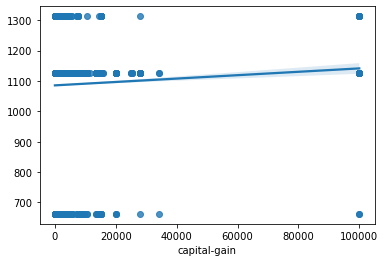

In [153]:
sns.regplot(y_test,predictions)

In [154]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:           capital-gain   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.695
Date:                Fri, 16 Jun 2023   Prob (F-statistic):            0.00337
Time:                        08:39:05   Log-Likelihood:            -2.9762e+05
No. Observations:               28779   AIC:                         5.952e+05
Df Residuals:                   28776   BIC:                         5.953e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [156]:
##use non linear regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)

In [159]:
model.fit(X, Y)

LogisticRegression(random_state=0, solver='liblinear')

In [161]:
model.intercept_
model.coef_

array([[ 0.88642126,  0.48629982,  0.50844306],
       [-1.1823813 , -3.0614332 , -1.3796292 ],
       [-1.92167218, -2.71902708, -1.23614256],
       [-1.43918053, -1.80956304, -1.75584508],
       [-2.08233871, -2.55641312, -0.99705762],
       [-1.94482097, -2.64127139, -1.25562167],
       [-1.8272103 , -2.09011   , -1.13228469],
       [-2.04658107, -2.68050071, -0.96181078],
       [-1.79506861, -3.14590506, -1.13064604],
       [-1.60470868, -2.54566468, -1.41402845],
       [-1.92167218, -2.71902708, -1.23614256],
       [-1.54913426, -3.23060673, -1.18694427],
       [-1.77091534, -2.5328317 , -1.35768928],
       [-1.8958995 , -2.80569573, -1.2145283 ],
       [-1.8958995 , -2.80569573, -1.2145283 ],
       [-1.81654983, -2.76160801, -1.02128518],
       [-1.6617687 , -2.32919641, -1.2589928 ],
       [-1.79506861, -3.14590506, -1.13064604],
       [-1.79506861, -3.14590506, -1.13064604],
       [-1.75201243, -2.59221805, -1.34291848],
       [-1.5455189 , -2.72468142, -1.369

In [162]:
model.score(X,Y)

0.9170037109619313

In [164]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y, model.predict(X))

array([[43985,     0,     0, ...,     0,     0,     0],
       [    8,     0,     0, ...,     0,     0,     0],
       [    5,     0,     0, ...,     0,     0,     0],
       ...,
       [    6,     0,     0, ...,     0,     0,     0],
       [    3,     0,     0, ...,     0,     0,     0],
       [  241,     0,     0, ...,     0,     0,     0]], dtype=int64)